# Alexnet Baseline

In [9]:
from util.load_bottles import load_data_to_vearch
from init_vearch_local import create_space,delete_space,create_db
from util.vearchutil import VearchUtil

db_name="bottle"
create_db(db_name)

model_name = "alexnet"
image_name = "./data/zerobox/images/blackbottles/00001.png"
util = VearchUtil(model_name=model_name)
item = util.extract_feature(image=image_name)
feature_dim = len(item)
print(feature_dim)

delete_space("bottle",model_name)
create_space("bottle",model_name,feature_dim=feature_dim,partition=4)
load_data_to_vearch(data_path="./data/zerobox", model_name=model_name)


{"code":550,"msg":"dbname bottle is exists"}
256
{"code":200,"msg":"success"}


INFO 2021-12-05 17:58:38,384 load_bottles 285877 140379368503104 load_data_to_vearch(./data/zerobox,alexnet)


b'{"code":200,"msg":"success","data":{"id":12,"name":"alexnet","version":2,"db_id":1,"enabled":true,"partitions":[{"id":51,"space_id":12,"db_id":1,"partition_slot":0,"replicas":[1]},{"id":52,"space_id":12,"db_id":1,"partition_slot":1073741823,"replicas":[1]},{"id":53,"space_id":12,"db_id":1,"partition_slot":2147483646,"replicas":[1]},{"id":54,"space_id":12,"db_id":1,"partition_slot":3221225469,"replicas":[1]}],"partition_num":4,"replica_num":1,"properties":{"image_name": {"type": "keyword", "index": true}, "image": {"type": "vector", "dimension": 256, "format": "normalization"}, "model_name": {"type": "keyword", "index": true}, "keyword": {"type": "keyword", "index": true}, "tags": {"type": "string", "array": true, "index": true}, "uuid": {"type": "keyword", "index": true}, "sid": {"type": "keyword", "index": true}},"engine":{"name":"gamma","index_size":70000,"metric_type":"InnerProduct","retrieval_type":"IVFPQ","retrieval_param":{"metric_type": "InnerProduct", "ncentroids": 256, "nsub

In [10]:
from util.testutil import TestUtil
from pprint import pprint

# batch test results
testutil = TestUtil(model_name="alexnet")
(accuracy, cmatrix,wrong_results) = testutil.test()

pprint(f"Final accuracy: {accuracy}")
pprint(cmatrix)
print("Wrong results:")
pprint(wrong_results)


INFO 2021-12-05 17:59:22,771 testutil 285877 140379368503104 TestUtil test alexnet


'Final accuracy: 0.8461538461538461'
              babyblue01  babyblue02  beige01  blackbottles  blackcup  \
babyblue01           0.0         0.0      0.0           0.0       0.0   
babyblue02           0.0         1.0      0.0           0.0       0.0   
beige01              2.0         0.0      2.0           0.0       0.0   
blackbottles         0.0         0.0      0.0          21.0       0.0   
blackcup             0.0         0.0      0.0           0.0       2.0   
blacktumbler         0.0         0.0      0.0           0.0       0.0   
blue                 0.0         0.0      0.0           0.0       0.0   
lavender01           0.0         0.0      0.0           0.0       0.0   
notfound             0.0         0.0      0.0           0.0       0.0   
red01                0.0         0.0      0.0           0.0       0.0   
red02                0.0         0.0      0.0           0.0       0.0   
silver               0.0         0.0      0.0           0.0       0.0   
white         

# VGG16 Baseline

In [27]:
from util.load_bottles import load_data_to_vearch
from init_vearch_local import create_space,delete_space,create_db
from util.vearchutil import VearchUtil

db_name="bottle"
create_db(db_name)

model_name = "vgg16"
image_name = "./data/zerobox/images/blackbottles/00001.png"
util = VearchUtil(model_name=model_name)
item = util.extract_feature(image=image_name)
feature_dim = len(item)
print(feature_dim)

delete_space("bottle",model_name)
create_space("bottle",model_name,feature_dim=feature_dim,partition=4)
load_data_to_vearch(data_path="./data/zerobox", model_name=model_name)

{"code":550,"msg":"dbname bottle is exists"}
512
{"code":200,"msg":"success"}


INFO 2021-12-05 18:21:42,716 load_bottles 285877 140379368503104 load_data_to_vearch(./data/zerobox,vgg16)


b'{"code":200,"msg":"success","data":{"id":16,"name":"vgg16","version":2,"db_id":1,"enabled":true,"partitions":[{"id":67,"space_id":16,"db_id":1,"partition_slot":0,"replicas":[1]},{"id":68,"space_id":16,"db_id":1,"partition_slot":1073741823,"replicas":[1]},{"id":69,"space_id":16,"db_id":1,"partition_slot":2147483646,"replicas":[1]},{"id":70,"space_id":16,"db_id":1,"partition_slot":3221225469,"replicas":[1]}],"partition_num":4,"replica_num":1,"properties":{"image_name": {"type": "keyword", "index": true}, "image": {"type": "vector", "dimension": 512, "format": "normalization"}, "model_name": {"type": "keyword", "index": true}, "keyword": {"type": "keyword", "index": true}, "tags": {"type": "string", "array": true, "index": true}, "uuid": {"type": "keyword", "index": true}, "sid": {"type": "keyword", "index": true}},"engine":{"name":"gamma","index_size":70000,"metric_type":"InnerProduct","retrieval_type":"IVFPQ","retrieval_param":{"metric_type": "InnerProduct", "ncentroids": 256, "nsubve

In [29]:
# batch test results
from util.testutil import TestUtil
from pprint import pprint

testutil = TestUtil(model_name="vgg16",data_path="./data/zerobox")
(accuracy, cmatrix,wrong_results) = testutil.test()

pprint(f"Final accuracy: {accuracy}")
pprint(cmatrix)
print("Wrong results:")
pprint(wrong_results)


INFO 2021-12-05 18:22:12,574 testutil 285877 140379368503104 TestUtil test vgg16


'Final accuracy: 0.8717948717948718'
              babyblue01  babyblue02  beige01  blackbottles  blackcup  \
babyblue01           0.0         0.0      0.0           0.0       0.0   
babyblue02           0.0         1.0      0.0           0.0       0.0   
beige01              1.0         0.0      2.0           0.0       0.0   
blackbottles         0.0         0.0      0.0          21.0       0.0   
blackcup             0.0         0.0      0.0           0.0       2.0   
blacktumbler         0.0         0.0      0.0           0.0       0.0   
blue                 0.0         0.0      0.0           0.0       0.0   
lavender01           0.0         0.0      0.0           0.0       0.0   
notfound             0.0         0.0      0.0           0.0       0.0   
red01                0.0         0.0      0.0           0.0       0.0   
red02                0.0         0.0      0.0           0.0       0.0   
silver               0.0         0.0      0.0           0.0       0.0   
white         

# Demo Search results

## correct result

{'data': {'image_name': './data/zerobox/images/blue/00001.png',
          'keyword': '',
          'model_name': 'alexnet',
          'sid': 'blue',
          'tags': ['blue'],
          'uuid': 'ef676048-ed9d-421b-8abb-e0d7af53b8a0'},
 'score': 0.9587475061416626,
 'vearch_id': 'ef676048-ed9d-421b-8abb-e0d7af53b8a0'}


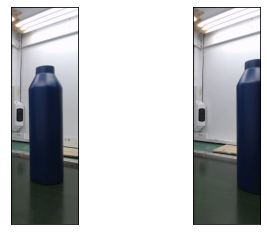

In [31]:
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
import cv2

util = VearchUtil(model_name="alexnet")
image_name="./data/zerobox/images/blue/00007.png"
item = util.search_by_image(image=image_name)
pprint(item)

image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread(item["data"]["image_name"])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

TestUtil.plot_images([image,image2])

# to view all images
# https://drive.google.com/drive/folders/1-qIJfJl9Xhw0eMKnIIAlLGbsB2zfz8Gc


## Wrong result

{'data': {'image_name': './data/zerobox/images/beige01/output0009.png',
          'keyword': '',
          'model_name': 'alexnet',
          'sid': 'beige01',
          'tags': ['beige01'],
          'uuid': '7437e116-9d47-449c-8f9f-7c93e3589ccd'},
 'score': 0.9507838487625122,
 'vearch_id': '7437e116-9d47-449c-8f9f-7c93e3589ccd'}


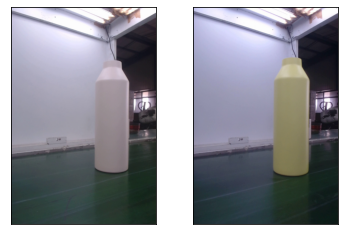

In [32]:
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
import cv2

util = VearchUtil(model_name="alexnet")
image_name="./data/zerobox/images/white02/output0064.png"
item = util.search_by_image(image=image_name)
pprint(item)

image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(item["data"]["image_name"])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

TestUtil.plot_images([image,image2])

# New Project Result

In [1]:
from util.load_bottles import load_data_to_vearch
from init_vearch_local import create_space,delete_space,create_db
from util.vearchutil import VearchUtil

db_name="bottle"
create_db(db_name)

model_name = "alphaalex"
image_name = "./data/zerobox/images/blackbottles/00001.png"
util = VearchUtil(model_name=model_name)
item = util.extract_feature(image=image_name)
feature_dim = len(item)
print(feature_dim)

delete_space("bottle",model_name)
create_space("bottle",model_name,feature_dim=feature_dim,partition=4)
load_data_to_vearch(data_path="./data/zerobox_nobg", model_name=model_name)

{"code":550,"msg":"dbname bottle is exists"}
512
{"code":565,"msg":"space_notexists"}


INFO 2021-12-05 18:49:37,800 load_bottles 302295 140535233873728 load_data_to_vearch(./data/zerobox_nobg,alphaalex)


b'{"code":200,"msg":"success","data":{"id":17,"name":"alphaalex","version":2,"db_id":1,"enabled":true,"partitions":[{"id":71,"space_id":17,"db_id":1,"partition_slot":0,"replicas":[1]},{"id":72,"space_id":17,"db_id":1,"partition_slot":1073741823,"replicas":[1]},{"id":73,"space_id":17,"db_id":1,"partition_slot":2147483646,"replicas":[1]},{"id":74,"space_id":17,"db_id":1,"partition_slot":3221225469,"replicas":[1]}],"partition_num":4,"replica_num":1,"properties":{"image_name": {"type": "keyword", "index": true}, "image": {"type": "vector", "dimension": 512, "format": "normalization"}, "model_name": {"type": "keyword", "index": true}, "keyword": {"type": "keyword", "index": true}, "tags": {"type": "string", "array": true, "index": true}, "uuid": {"type": "keyword", "index": true}, "sid": {"type": "keyword", "index": true}},"engine":{"name":"gamma","index_size":70000,"metric_type":"InnerProduct","retrieval_type":"IVFPQ","retrieval_param":{"metric_type": "InnerProduct", "ncentroids": 256, "ns

In [2]:
# batch test results
from util.testutil import TestUtil
from pprint import pprint

testutil = TestUtil(model_name="alphaalex",data_path="./data/zerobox_nobg")
(accuracy, cmatrix,wrong_results) = testutil.test()

pprint(f"Final accuracy: {accuracy}")
pprint(wrong_results)
pprint(cmatrix)
print("Wrong results:")
pprint(wrong_results)


INFO 2021-12-05 18:51:43,559 testutil 302295 140535233873728 TestUtil test alphaalex


'Final accuracy: 0.84'
['./data/zerobox_nobg/images/blacktumbler/00009.png',
 './data/zerobox_nobg/images/lavender01/output0090.png',
 './data/zerobox_nobg/images/white01/bumbler0011.png',
 './data/zerobox_nobg/images/white03/output0065.png']
              babyblue01  babyblue02  beige01  blackbottles  blackcup  \
babyblue01           1.0         0.0      0.0           0.0       0.0   
babyblue02           0.0         1.0      0.0           0.0       0.0   
beige01              0.0         0.0      2.0           0.0       0.0   
blackbottles         0.0         0.0      0.0           4.0       0.0   
blackcup             0.0         0.0      0.0           0.0       1.0   
blacktumbler         0.0         0.0      0.0           0.0       0.0   
blue                 0.0         0.0      0.0           0.0       0.0   
lavender01           0.0         0.0      0.0           0.0       0.0   
notfound             0.0         0.0      0.0           0.0       0.0   
red01                0.0   

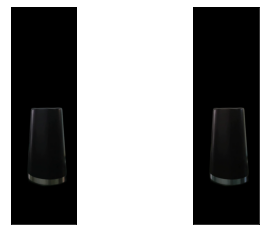

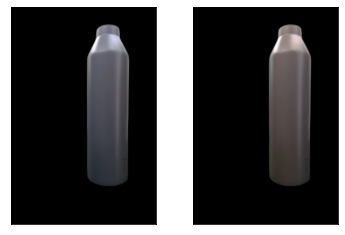

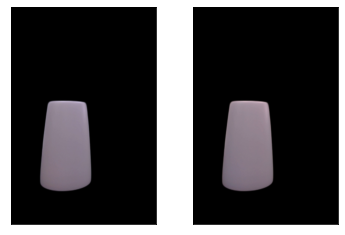

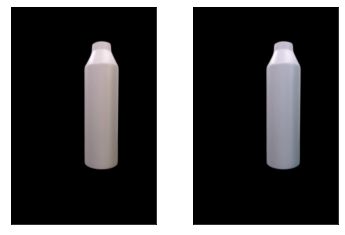

In [8]:
# batch test results
from util.testutil import TestUtil
from pprint import pprint
import cv2
from util.vearchutil import VearchUtil

util = VearchUtil(model_name="alphaalex")
wrong_images = ['./data/zerobox_nobg/images/blacktumbler/00009.png',
 './data/zerobox_nobg/images/lavender01/output0090.png',
 './data/zerobox_nobg/images/white01/bumbler0011.png',
 './data/zerobox_nobg/images/white03/output0065.png']

images = []
for image_name in wrong_images:
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    item = util.search_by_image(image=image_name)
    image2 = cv2.imread(item["data"]["image_name"])
    image2 = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    # pprint(item)
    TestUtil.plot_images([image,image2])

In [118]:
# testing code
import numpy as np
import json
import os
from pprint import pprint

x = np.random.randint(0,2,10)
pprint(x)

data = json.load(open("./data/zerobox_nobg/meta_train.json"))
print(len(data))

data = json.load(open("./data/zerobox_nobg/meta_test.json"))
print(len(data))

data = json.load(open("./data/zerobox_nobg/meta_classes.json"))
print(len(data))

x = np.arange(0,10)
random_indices = np.random.choice(len(x), size=3, replace=True)
pprint(x[random_indices])


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])
62
25
18
array([0, 4, 8])
